# Metodologi 
# Preprocessing -> Sentiment Classification -> Topic Modelling -> Algoritma Deteksi Provokator per Topik 

In [8]:
import pandas as pd

df = pd.read_csv('demo_data.csv')
df2 = pd.read_csv('final_data.csv')

df
df2

,Unnamed: 0,conversation_id,date,time,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags
0,0,1258425982907637761,2020-05-07,23:58:29,1058474317,monologis_id,https://bit.ly/2L6CcbB | Seharusnya saat ini...,[],0,3,0,[]
1,1,1258320972198940675,2020-05-07,23:57:30,1179769476,its_dul,Klo kata gw Pemerintah tuh lagi menerapkan Her...,['mas__piyuuu'],0,0,0,[]
2,2,1258356644427083777,2020-05-07,23:53:20,1012156669831229441,meonkbaong,Saat ini yang bisa saya lakukan hanya menyiapk...,['oiivert'],0,0,0,[]
3,3,1258424368993931265,2020-05-07,23:52:04,1204303690061844481,rakyatdotnews,"Satu Warga Positif Corona, Bupati: Kondisi ini...",[],0,0,0,"['#rakyatdotnews', '#referensiterkini', '#raky..."
4,4,1258423545698246656,2020-05-07,23:48:48,227620381,annisathalib_,"emosi bgt, lg kondisi begini gue disuruh liput...",[],0,0,0,['#dirumahaja']
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1258122222931251200,2020-05-07,03:51:27,868057794666037249,gemawonorejo,Informasi Desa Wonorejo :\n\nMenindaklanjuti H...,[],0,0,0,[]
996,996,1258075937360371719,2020-05-07,03:43:49,1250548142400958464,covid_19chinese,Semoga pemerintah benar-benar serius. Saya har...,"['sitiftmwti', 'mn_choo', 'dennyyap1', 'lesyeu...",1,0,0,[]
997,997,1258075937360371719,2020-05-07,03:31:41,1240834881891909632,sitiftmwti,Pemerintah dalam hal serius menangani Covid in...,"['covid_19chinese', 'mn_choo', 'dennyyap1', 'l...",1,0,0,[]
998,998,1258116968185335809,2020-05-07,03:30:34,921740399437283330,freemasonryid,"""Termutakhir, Salah seorang petinggi militer A...",[],0,0,0,[]


In [9]:
df['username'] = df2['username']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1260 non-null   int64 
 1   text        1260 non-null   object
 2   sentiment   1260 non-null   object
 3   clean_text  1260 non-null   object
 4   label       1260 non-null   int64 
 5   username    1000 non-null   object
dtypes: int64(2), object(4)
memory usage: 59.2+ KB


In [10]:
df = df.iloc[:1000]

In [11]:
df

,Unnamed: 0,text,sentiment,clean_text,label,username
0,0,"meski masa kampanye sudah selesai , bukan bera...",neutral,"meski masa kampanye sudah selesai , bukan bera...",0,monologis_id
1,1,tidak enak,negative,tidak enak,1,its_dul
2,2,restoran ini menawarkan makanan sunda . kami m...,positive,restoran ini menawarkan makanan sunda . kami m...,2,meonkbaong
3,3,lokasi di alun alun masakan padang ini cukup t...,positive,lokasi di alun alun masakan padang ini cukup t...,2,rakyatdotnews
4,4,betapa bejad kader gerindra yang anggota dprd ...,negative,betapa bejad kader gerindra yang anggota dprd ...,1,annisathalib_
...,...,...,...,...,...,...
995,995,cinta pada pandangan pertama . perasaan itu la...,positive,cinta pada pandangan pertama . perasaan itu la...,2,gemawonorejo
996,996,kebetulan lokasi nya dekat dengan tempat mengi...,positive,kebetulan lokasi nya dekat dengan tempat mengi...,2,covid_19chinese
997,997,pan yakin punya modal jadi pilpres setelah men...,neutral,pan yakin punya modal jadi pilpres setelah men...,0,sitiftmwti
998,998,"menu favorit ku di sini adalah pork neck , tap...",positive,"menu favorit ku di sini adalah pork neck , tap...",2,freemasonryid


In [12]:
import pandas as pd
import numpy as np

def insert_random_dates(start_date, end_date, n):
    """
    Generates n random dates between start_date and end_date.
    
    Args:
        start_date (str or pd.Timestamp): The beginning of the date range.
        end_date (str or pd.Timestamp): The end of the date range.
        n (int): The number of random dates to generate.
        
    Returns:
        pd.Series: A pandas Series containing random datetime objects.
    """
    # Convert string dates to pandas Timestamp objects
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    
    # Calculate the total number of days in the range
    ndays = (end - start).days + 1
    
    # Generate 'n' random integers representing days within the range
    random_days = np.random.randint(0, ndays, n)
    
    # Add these random days as a timedelta to the start date
    random_dates = start + pd.to_timedelta(random_days, unit='D')
    
    return pd.Series(random_dates)

# --- Example Usage ---
df4 = pd.DataFrame({'value': np.random.randn(1000)}) # Example DataFrame with 10 rows
start_date_str = '2023-01-01'
end_date_str = '2024-01-01'

df['date'] = insert_random_dates(start_date_str, end_date_str, len(df))

print(df)


     Unnamed: 0                                               text sentiment  \
0             0  meski masa kampanye sudah selesai , bukan bera...   neutral   
1             1                                         tidak enak  negative   
2             2  restoran ini menawarkan makanan sunda . kami m...  positive   
3             3  lokasi di alun alun masakan padang ini cukup t...  positive   
4             4  betapa bejad kader gerindra yang anggota dprd ...  negative   
..          ...                                                ...       ...   
995         995  cinta pada pandangan pertama . perasaan itu la...  positive   
996         996  kebetulan lokasi nya dekat dengan tempat mengi...  positive   
997         997  pan yakin punya modal jadi pilpres setelah men...   neutral   
998         998  menu favorit ku di sini adalah pork neck , tap...  positive   
999         999             paket winger kfc murah meriah dan enak  positive   

                                       

In [13]:
df.isna().sum()

Unnamed: 0    0
text          0
sentiment     0
clean_text    0
label         0
username      0
date          0
dtype: int64

In [16]:
df.to_csv('demo_data_final.csv')

In [7]:
df

,value,date
0,0.751818,2023-06-12
1,-0.787613,2023-07-19
2,0.446962,2023-12-23
3,-0.711865,2023-10-13
4,1.543799,2023-05-26
5,-0.535128,2023-08-24
6,-1.269073,2023-08-05
7,-1.712783,2023-06-03
8,1.374961,2023-08-16
9,-0.485872,2023-09-28


In [5]:
df3 = df.iloc[:1000]
df3

,Unnamed: 0,text,sentiment,clean_text,label,username,date
0,0,"meski masa kampanye sudah selesai , bukan bera...",neutral,"meski masa kampanye sudah selesai , bukan bera...",0,monologis_id,2020-05-07
1,1,tidak enak,negative,tidak enak,1,its_dul,2020-05-07
2,2,restoran ini menawarkan makanan sunda . kami m...,positive,restoran ini menawarkan makanan sunda . kami m...,2,meonkbaong,2020-05-07
3,3,lokasi di alun alun masakan padang ini cukup t...,positive,lokasi di alun alun masakan padang ini cukup t...,2,rakyatdotnews,2020-05-07
4,4,betapa bejad kader gerindra yang anggota dprd ...,negative,betapa bejad kader gerindra yang anggota dprd ...,1,annisathalib_,2020-05-07
...,...,...,...,...,...,...,...
995,995,cinta pada pandangan pertama . perasaan itu la...,positive,cinta pada pandangan pertama . perasaan itu la...,2,gemawonorejo,2020-05-07
996,996,kebetulan lokasi nya dekat dengan tempat mengi...,positive,kebetulan lokasi nya dekat dengan tempat mengi...,2,covid_19chinese,2020-05-07
997,997,pan yakin punya modal jadi pilpres setelah men...,neutral,pan yakin punya modal jadi pilpres setelah men...,0,sitiftmwti,2020-05-07
998,998,"menu favorit ku di sini adalah pork neck , tap...",positive,"menu favorit ku di sini adalah pork neck , tap...",2,freemasonryid,2020-05-07


In [2]:
import pandas as pd
import numpy as np

In [2]:
import os

os.getcwd()

'C:\\Users\\Abdullah Ghassan\\env - semester 5\\softeng'

In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alvinhanafie/dataset-for-indonesian-sentiment-analysis")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 860k/860k [00:01<00:00, 615kB/s]

Extracting files...
Path to dataset files: C:\Users\Abdullah Ghassan\.cache\kagglehub\datasets\alvinhanafie\dataset-for-indonesian-sentiment-analysis\versions\4


In [3]:
train = pd.read_csv('train_preprocess_ori.tsv', sep = '\t')
test = pd.read_csv('valid_preprocess.tsv', sep = '\t')
val = pd.read_csv('')

In [36]:
train

,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [37]:
test

,text,sentiment
0,"meski masa kampanye sudah selesai , bukan bera...",neutral
1,tidak enak,negative
2,restoran ini menawarkan makanan sunda . kami m...,positive
3,lokasi di alun alun masakan padang ini cukup t...,positive
4,betapa bejad kader gerindra yang anggota dprd ...,negative
...,...,...
1255,"film tncfu , tidak cocok untuk penonton yang t...",negative
1256,"indihome ini mahal loh bayar nya . hanya , pen...",negative
1257,"be de gea , cowok cupu yang takut dengan pacar...",negative
1258,valen yang sangat tidak berkualitas . konentat...,negative


In [38]:
train.head(50)

,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
5,"makanan beragam , harga makanan di food stall ...",positive
6,pakai kartu kredit bca tidak untung malah rugi...,negative
7,"tempat unik , bagus buat foto , makanan enak ,...",positive
8,saya bersama keluarga baru saja menikmati peng...,positive
9,bersyukur,positive


# **Model 1: modernBERT**

## Preprocessing for BERT

In [4]:
import re

def specialized_cleaning(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Hapus bagian "Nb: ..."
    text = re.sub(r'nb:.*', '', text)
    
    # Normalisasi karakter berulang ("sakiitttt" -> "sakit")
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    
    # Ganti baris baru dengan spasi
    text = text.replace('\n', ' ')
    
    # Kamus Slang
    slang_dict = {
        r'\buu\b': 'undang undang',
        r'\bga\b': 'tidak',
        r'\bgak\b': 'tidak',
        r'\bgw\b': 'aku', 
        r'\bkrn\b': 'karena',
        r'\bkalo\b': 'kalau',
        r'\bkl\b': 'kalau', 
        r'\btdk\b': 'tidak',
        r'\bsy\b': 'saya',
        r'\bpie\b': 'bagaimana', 
        r'\bbgt\b': 'banget',
        r'\bdgn\b': 'dengan',
        r'\biki\b': 'ini', 
        r'\bsdh\b': 'sudah', 
        r'\baja\b': 'saja',
        r'\btrus\b': 'terus', 
        r'\bsm\b': 'sama',
        r'\bdtg\b': 'datang',
        r'\bbgmn\b' : 'bagaimana',
        r'\bgimana\b' : 'bagaimana',
         r'\bbyk\b' : 'banyak',
         r'\bbodo amat\b' : 'tidak peduli',
         r'\btuh\b' : 'itu',
         r'\bngaca\b' : 'intropeksi',
        r'\bmmbri\b' : 'memberi'
        
    }
    for pattern, replacement in slang_dict.items():
        text = re.sub(pattern, replacement, text)
        
    # HAPUS EMOJI & Simbol Aneh (Hanya sisakan huruf, angka, spasi, .,!?)
    text = re.sub(r'[^a-z0-9\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [5]:
train['clean_text'] = train['text'].apply(specialized_cleaning)
train[['text', 'clean_text']].head(10)

,text,clean_text
0,warung ini dimiliki oleh pengusaha pabrik tahu...,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus dan k212 memberi hujjah part...
2,lokasi strategis di jalan sumatera bandung . t...,lokasi strategis di jalan sumatera bandung . t...
3,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,duh . jadi mahasiswa jangan sombong dong . kas...
5,"makanan beragam , harga makanan di food stall ...","makanan beragam , harga makanan di food stall ..."
6,pakai kartu kredit bca tidak untung malah rugi...,pakai kartu kredit bca tidak untung malah rugi...
7,"tempat unik , bagus buat foto , makanan enak ,...","tempat unik , bagus buat foto , makanan enak ,..."
8,saya bersama keluarga baru saja menikmati peng...,saya bersama keluarga baru saja menikmati peng...
9,bersyukur,bersyukur


In [6]:
test['clean_text'] = test['text'].apply(specialized_cleaning)

In [7]:
label_dict = {'positive' : 2, 'negative' : 1 , 'neutral' : 0}

train['label'] = train['sentiment'].map(label_dict)
test['label'] = test['sentiment'].map(label_dict)

In [8]:
train

,text,sentiment,clean_text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...,2
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 memberi hujjah part...,0
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung . t...,2
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...,2
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh . jadi mahasiswa jangan sombong dong . kas...,1
...,...,...,...,...
10995,tidak kecewa,positive,tidak kecewa,2
10996,enak rasa masakan nya apalagi kepiting yang me...,positive,enak rasa masakan nya apalagi kepiting yang me...,2
10997,hormati partai-partai yang telah berkoalisi,neutral,hormati partaipartai yang telah berkoalisi,0
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative,"pagi pagi di tol pasteur sudah macet parah , b...",1


In [9]:
test

,text,sentiment,clean_text,label
0,"meski masa kampanye sudah selesai , bukan bera...",neutral,"meski masa kampanye sudah selesai , bukan bera...",0
1,tidak enak,negative,tidak enak,-1
2,restoran ini menawarkan makanan sunda . kami m...,positive,restoran ini menawarkan makanan sunda . kami m...,1
3,lokasi di alun alun masakan padang ini cukup t...,positive,lokasi di alun alun masakan padang ini cukup t...,1
4,betapa bejad kader gerindra yang anggota dprd ...,negative,betapa bejad kader gerindra yang anggota dprd ...,-1
...,...,...,...,...
1255,"film tncfu , tidak cocok untuk penonton yang t...",negative,"film tncfu , tidak cocok untuk penonton yang t...",-1
1256,"indihome ini mahal loh bayar nya . hanya , pen...",negative,"indihome ini mahal loh bayar nya . hanya , pen...",-1
1257,"be de gea , cowok cupu yang takut dengan pacar...",negative,"be de gea , cowok cupu yang takut dengan pacar...",-1
1258,valen yang sangat tidak berkualitas . konentat...,negative,valen yang sangat tidak berkualitas . konentat...,-1


In [11]:
test.to_csv('demo_data.csv')

In [9]:
import joblib

joblib.dump((train, test), 'softeng.joblib')

['softeng.joblib']

In [13]:
joblib.dump((train, test), 'softeng.joblib')

['softeng.joblib']

Preprocessing BERT masih simpan tanda baca, supaya menangkap konteks kalimat

In [2]:
X_train = train['clean_text']
y_train = train['label']
X_temp = test['clean_text']
y_temp = test['label']

from sklearn.model_selection import train_test_split
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp
)

In [6]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(
    "answerdotai/ModernBERT-base",
    cache_dir=r'C:\Users\Abdullah Ghassan\.cache\huggingface\hub'
)

In [3]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained("FacebookAI/roberta-base", cache_dir = r'C:\Users\Abdullah Ghassan\.cache\huggingface\hub')

In [9]:
tokenizer

PreTrainedTokenizerFast(name_or_path='answerdotai/ModernBERT-base', vocab_size=50280, model_max_length=8192, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("|||IP_ADDRESS|||", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	1: AddedToken("<|padding|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50254: AddedToken("                        ", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	50255: AddedToken("                       ", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	50256: AddedToken("                      ", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	50257: AddedToken("                    

In [4]:
import torch
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
def create_dataset(texts, labels):
    encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=36, return_tensors='pt')
    dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(labels)) # would work here
    return dataset

# label must be convert to list so it worked for torch.tensor (reference line 5)
y_1 = y_train.to_list()
y_2 = y_val.to_list()
y_3 = y_test.to_list()

train_dataset = create_dataset(X_train, y_1)
val_dataset   = create_dataset(X_val, y_2)
test_dataset  = create_dataset(X_test, y_3)

batch_size = 16
train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
val_loader   = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)
test_loader  = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)

In [25]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device('cpu')

from transformers import AutoModelForSequenceClassification
from torch.optim import AdamW
import torch.nn as nn

model_id = "answerdotai/modernBERT-base"
model = AutoModelForSequenceClassification.from_pretrained(model_id, cache_dir = "C:/Users/Abdullah Ghassan/.cache/huggingface/hub",
                                                          num_labels = 3)

torch.cuda.empty_cache()
model.to(device)
optimizer = AdamW(model.parameters(), lr = 2e-5, eps=1e-8)
criterion = nn.CrossEntropyLoss() 
print(f"Model device: {next(model.parameters()).device}")

Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at answerdotai/modernBERT-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model device: cuda:0


In [26]:
from sklearn.metrics import accuracy_score, f1_score
'''
helper function for time and model metrics
'''
def format_time(elapsed):
    return str(elapsed)

def calculate_metrics(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    acc = accuracy_score(labels_flat, pred_flat)
    f1 = f1_score(labels_flat, pred_flat, average='macro') 
    return acc, f1

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os # Untuk path file
import time
from tqdm import tqdm

# ==========================================
# PERSIAPAN PENYIMPANAN
# ==========================================

epochs = 8
best_val_f1 = 0.0 # Rekor F1 tertinggi saat ini (inisialisasi 0)
save_path = 'best_model_modernBERT.pt' # Nama file model

print(f"Training dimulai... Model terbaik akan disimpan di: {save_path}")

for epoch_i in range(0, epochs):
    # training core
    print(f'\n======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training...')
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_loader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()
        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=None)
        logits = outputs.logits
        
        loss = criterion(logits, b_labels)
        if torch.isnan(loss):
            print("Loss is NaN! Stopping training to debug.")
            # You can print other tensors here to inspect their values
            # print("Logits:", logits)
            # print("Labels:", b_labels)
            break 
        total_train_loss += loss.item()
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_loader)
    
    # --- FASE VALIDASI ---
    print('\nRunning Validation...')
    model.eval()
    
    total_eval_accuracy = 0
    total_eval_f1 = 0
    total_eval_loss = 0

    for batch in val_loader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=None)
            logits = outputs.logits
            loss = criterion(logits, b_labels)
            
        total_eval_loss += loss.item()
        
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        tmp_eval_accuracy, tmp_eval_f1 = calculate_metrics(logits, label_ids)
        total_eval_accuracy += tmp_eval_accuracy
        total_eval_f1 += tmp_eval_f1

    avg_val_loss = total_eval_loss / len(val_loader)
    avg_val_accuracy = total_eval_accuracy / len(val_loader)
    avg_val_f1 = total_eval_f1 / len(val_loader)

    print(f"\n  Hasil Epoch {epoch_i + 1}:")
    print(f"  Training Loss    : {avg_train_loss:.4f}")
    print(f"  Validation Loss  : {avg_val_loss:.4f}")
    print(f"  Validation Acc   : {avg_val_accuracy:.4f}")
    print(f"  Validation F1    : {avg_val_f1:.4f} (Macro)")

    # ==========================================
    # LOGIKA SIMPAN MODEL TERBAIK (CHECKPOINT)
    # ==========================================
    # Kita simpan jika F1 Score saat ini lebih besar dari rekor sebelumnya
    if avg_val_f1 > best_val_f1:
        print(f"  [INFO] F1 Score meningkat ({best_val_f1:.4f} --> {avg_val_f1:.4f}). Menyimpan model...")
        
        # Update rekor
        best_val_f1 = avg_val_f1
        
        # Simpan state_dict (bobotnya saja, lebih hemat memori)
        torch.save(model.state_dict(), save_path)
    else:
        print(f"  [INFO] F1 Score tidak meningkat (Best: {best_val_f1:.4f}).")

print("\nTraining Selesai!")

Training dimulai... Model terbaik akan disimpan di: best_model_modernBERT.pt

======== Epoch 1 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:42<00:00,  4.24it/s]



Running Validation...

  Hasil Epoch 1:
  Training Loss    : 0.6086
  Validation Loss  : 0.5332
  Validation Acc   : 0.7731
  Validation F1    : 0.6566 (Macro)
  [INFO] F1 Score meningkat (0.0000 --> 0.6566). Menyimpan model...

======== Epoch 2 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:41<00:00,  4.25it/s]



Running Validation...

  Hasil Epoch 2:
  Training Loss    : 0.3895
  Validation Loss  : 0.5179
  Validation Acc   : 0.8009
  Validation F1    : 0.7053 (Macro)
  [INFO] F1 Score meningkat (0.6566 --> 0.7053). Menyimpan model...

======== Epoch 3 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:42<00:00,  4.25it/s]



Running Validation...

  Hasil Epoch 3:
  Training Loss    : 0.2306
  Validation Loss  : 0.4961
  Validation Acc   : 0.8449
  Validation F1    : 0.7542 (Macro)
  [INFO] F1 Score meningkat (0.7053 --> 0.7542). Menyimpan model...

======== Epoch 4 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:41<00:00,  4.25it/s]



Running Validation...

  Hasil Epoch 4:
  Training Loss    : 0.1364
  Validation Loss  : 0.8850
  Validation Acc   : 0.8449
  Validation F1    : 0.7607 (Macro)
  [INFO] F1 Score meningkat (0.7542 --> 0.7607). Menyimpan model...

======== Epoch 5 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:42<00:00,  4.23it/s]



Running Validation...

  Hasil Epoch 5:
  Training Loss    : 0.0592
  Validation Loss  : 1.2411
  Validation Acc   : 0.8380
  Validation F1    : 0.7484 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7607).

======== Epoch 6 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:42<00:00,  4.24it/s]



Running Validation...

  Hasil Epoch 6:
  Training Loss    : 0.0203
  Validation Loss  : 1.3176
  Validation Acc   : 0.8310
  Validation F1    : 0.7623 (Macro)
  [INFO] F1 Score meningkat (0.7607 --> 0.7623). Menyimpan model...

======== Epoch 7 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:44<00:00,  4.18it/s]



Running Validation...

  Hasil Epoch 7:
  Training Loss    : 0.0162
  Validation Loss  : 1.7001
  Validation Acc   : 0.8032
  Validation F1    : 0.6700 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7623).

======== Epoch 8 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:41<00:00,  4.26it/s]



Running Validation...

  Hasil Epoch 8:
  Training Loss    : 0.0183
  Validation Loss  : 1.6328
  Validation Acc   : 0.8356
  Validation F1    : 0.7455 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7623).

Training Selesai!


# Handle Class Imbalance + Evaluasi

In [29]:
from transformers import AutoModelForSequenceClassification
import numpy as np
from torch.optim import AdamW
import torch.nn as nn
from sklearn.utils.class_weight import compute_class_weight

# Hitung Class Weights (Penting untuk Imbalance!)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

model_id = "answerdotai/modernBERT-base"
model = AutoModelForSequenceClassification.from_pretrained(model_id, cache_dir = "C:/Users/Abdullah Ghassan/.cache/huggingface/hub",
                                                          num_labels = 3)
model.to(device)
state_dict = torch.load('best_model_modernBERT.pt', map_location=device)
model.load_state_dict(state_dict)
optimizer = AdamW(model.parameters(), lr = 2e-5, eps=1e-8)
criterion = nn.CrossEntropyLoss(weight=weights_tensor) #

Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at answerdotai/modernBERT-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os # Untuk path file
import time
from tqdm import tqdm

# ==========================================
# PERSIAPAN PENYIMPANAN
# ==========================================

epochs = 8
best_val_f1 = 0
save_path = 'best_model_modernBERT_2.pt' # Nama file model

print(f"Training dimulai... Model terbaik akan disimpan di: {save_path}")

for epoch_i in range(0, epochs):
    # training core
    print(f'\n======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training...')
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_loader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()
        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=None)
        logits = outputs.logits
        
        loss = criterion(logits, b_labels)
        if torch.isnan(loss):
            print("Loss is NaN! Stopping training to debug.")
            # You can print other tensors here to inspect their values
            # print("Logits:", logits)
            # print("Labels:", b_labels)
            break 
        total_train_loss += loss.item()
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_loader)
    
    # --- FASE VALIDASI ---
    print('\nRunning Validation...')
    model.eval()
    
    total_eval_accuracy = 0
    total_eval_f1 = 0
    total_eval_loss = 0

    for batch in val_loader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=None)
            logits = outputs.logits
            loss = criterion(logits, b_labels)
            
        total_eval_loss += loss.item()
        
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        tmp_eval_accuracy, tmp_eval_f1 = calculate_metrics(logits, label_ids)
        total_eval_accuracy += tmp_eval_accuracy
        total_eval_f1 += tmp_eval_f1

    avg_val_loss = total_eval_loss / len(val_loader)
    avg_val_accuracy = total_eval_accuracy / len(val_loader)
    avg_val_f1 = total_eval_f1 / len(val_loader)

    print(f"\n  Hasil Epoch {epoch_i + 1}:")
    print(f"  Training Loss    : {avg_train_loss:.4f}")
    print(f"  Validation Loss  : {avg_val_loss:.4f}")
    print(f"  Validation Acc   : {avg_val_accuracy:.4f}")
    print(f"  Validation F1    : {avg_val_f1:.4f} (Macro)")

    # ==========================================
    # LOGIKA SIMPAN MODEL TERBAIK (CHECKPOINT)
    # ==========================================
    # Kita simpan jika F1 Score saat ini lebih besar dari rekor sebelumnya
    if avg_val_f1 > best_val_f1:
        print(f"  [INFO] F1 Score meningkat ({best_val_f1:.4f} --> {avg_val_f1:.4f}). Menyimpan model...")
        
        # Update rekor
        best_val_f1 = avg_val_f1
        
        # Simpan state_dict (bobotnya saja, lebih hemat memori)
        torch.save(model.state_dict(), save_path)
    else:
        print(f"  [INFO] F1 Score tidak meningkat (Best: {best_val_f1:.4f}).")

print("\nTraining Selesai!")

Training dimulai... Model terbaik akan disimpan di: best_model_modernBERT_2.pt

======== Epoch 1 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:41<00:00,  4.26it/s]



Running Validation...

  Hasil Epoch 1:
  Training Loss    : 0.0257
  Validation Loss  : 3.0072
  Validation Acc   : 0.8403
  Validation F1    : 0.7622 (Macro)
  [INFO] F1 Score meningkat (0.0000 --> 0.7622). Menyimpan model...

======== Epoch 2 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:42<00:00,  4.24it/s]



Running Validation...

  Hasil Epoch 2:
  Training Loss    : 0.0202
  Validation Loss  : 2.8112
  Validation Acc   : 0.8310
  Validation F1    : 0.7145 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7622).

======== Epoch 3 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:41<00:00,  4.25it/s]



Running Validation...

  Hasil Epoch 3:
  Training Loss    : 0.0327
  Validation Loss  : 3.0040
  Validation Acc   : 0.7986
  Validation F1    : 0.7093 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7622).

======== Epoch 4 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:41<00:00,  4.26it/s]



Running Validation...

  Hasil Epoch 4:
  Training Loss    : 0.0368
  Validation Loss  : 3.1940
  Validation Acc   : 0.8380
  Validation F1    : 0.7555 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7622).

======== Epoch 5 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:41<00:00,  4.27it/s]



Running Validation...

  Hasil Epoch 5:
  Training Loss    : 0.0153
  Validation Loss  : 3.5489
  Validation Acc   : 0.8380
  Validation F1    : 0.7388 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7622).

======== Epoch 6 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:41<00:00,  4.27it/s]



Running Validation...

  Hasil Epoch 6:
  Training Loss    : 0.0199
  Validation Loss  : 3.6027
  Validation Acc   : 0.8472
  Validation F1    : 0.7456 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7622).

======== Epoch 7 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:41<00:00,  4.27it/s]



Running Validation...

  Hasil Epoch 7:
  Training Loss    : 0.0347
  Validation Loss  : 3.0344
  Validation Acc   : 0.8449
  Validation F1    : 0.7455 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7622).

======== Epoch 8 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [02:41<00:00,  4.27it/s]



Running Validation...

  Hasil Epoch 8:
  Training Loss    : 0.0249
  Validation Loss  : 3.2360
  Validation Acc   : 0.8264
  Validation F1    : 0.7175 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7622).

Training Selesai!


In [9]:
import torch
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from transformers import AutoModelForSequenceClassification
from torch.optim import AdamW
import torch
from sklearn.metrics import classification_report

model_id = "answerdotai/modernBERT-base"
model = AutoModelForSequenceClassification.from_pretrained(model_id, cache_dir = "C:/Users/Abdullah Ghassan/.cache/huggingface/hub",
                                                          num_labels = 3)
model.load_state_dict(torch.load('best_model_modernBERT_2.pt'))
model.to(device) 

model.eval()
predictions, true_labels = [], []

for batch in test_loader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    
    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    logits = outputs.logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    predictions.extend(np.argmax(logits, axis=1).flatten())
    true_labels.extend(label_ids.flatten())

print(classification_report(true_labels, predictions, target_names=['Neutral', 'Negative', 'Positive']))

Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at answerdotai/modernBERT-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


              precision    recall  f1-score   support

     Neutral       0.74      0.66      0.70        87
    Negative       0.82      0.75      0.78       263
    Positive       0.88      0.93      0.90       490

    accuracy                           0.85       840
   macro avg       0.81      0.78      0.79       840
weighted avg       0.84      0.85      0.84       840



# **Model 2: RoBERTa**

In [6]:
from transformers import AutoModelForSequenceClassification
import numpy as np
from torch.optim import AdamW
import torch.nn as nn
import torch
from sklearn.utils.class_weight import compute_class_weight
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hitung Class Weights (Penting untuk Imbalance!)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

model_id = "FacebookAI/roberta-base"
model = AutoModelForSequenceClassification.from_pretrained(model_id, cache_dir = "C:/Users/Abdullah Ghassan/.cache/huggingface/hub",
                                                          num_labels = 3)
model.to(device)
optimizer = AdamW(model.parameters(), lr = 2e-5, eps=1e-8)
criterion = nn.CrossEntropyLoss(weight=weights_tensor) 

import torch.nn.functional as F
import os # Untuk path file
import time
from tqdm import tqdm

from sklearn.metrics import accuracy_score, f1_score
'''
helper function for time and model metrics
'''
def format_time(elapsed):
    return str(elapsed)

def calculate_metrics(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    acc = accuracy_score(labels_flat, pred_flat)
    f1 = f1_score(labels_flat, pred_flat, average='macro') 
    return acc, f1

# ==========================================
# PERSIAPAN PENYIMPANAN
# ==========================================

epochs = 8
best_val_f1 = 0
save_path = 'best_model_roberta.pt' # Nama file model

print(f"Training dimulai... Model terbaik akan disimpan di: {save_path}")

for epoch_i in range(0, epochs):
    # training core
    print(f'\n======== Epoch {epoch_i + 1} / {epochs} ========')
    print('Training...')
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_loader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()
        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=None)
        logits = outputs.logits
        
        loss = criterion(logits, b_labels)
        if torch.isnan(loss):
            print("Loss is NaN! Stopping training to debug.")
            # You can print other tensors here to inspect their values
            # print("Logits:", logits)
            # print("Labels:", b_labels)
            break 
        total_train_loss += loss.item()
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_loader)
    
    # --- FASE VALIDASI ---
    print('\nRunning Validation...')
    model.eval()
    
    total_eval_accuracy = 0
    total_eval_f1 = 0
    total_eval_loss = 0

    for batch in val_loader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=None)
            logits = outputs.logits
            loss = criterion(logits, b_labels)
            
        total_eval_loss += loss.item()
        
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        tmp_eval_accuracy, tmp_eval_f1 = calculate_metrics(logits, label_ids)
        total_eval_accuracy += tmp_eval_accuracy
        total_eval_f1 += tmp_eval_f1

    avg_val_loss = total_eval_loss / len(val_loader)
    avg_val_accuracy = total_eval_accuracy / len(val_loader)
    avg_val_f1 = total_eval_f1 / len(val_loader)

    print(f"\n  Hasil Epoch {epoch_i + 1}:")
    print(f"  Training Loss    : {avg_train_loss:.4f}")
    print(f"  Validation Loss  : {avg_val_loss:.4f}")
    print(f"  Validation Acc   : {avg_val_accuracy:.4f}")
    print(f"  Validation F1    : {avg_val_f1:.4f} (Macro)")

    # ==========================================
    # LOGIKA SIMPAN MODEL TERBAIK (CHECKPOINT)
    # ==========================================
    # Kita simpan jika F1 Score saat ini lebih besar dari rekor sebelumnya
    if avg_val_f1 > best_val_f1:
        print(f"  [INFO] F1 Score meningkat ({best_val_f1:.4f} --> {avg_val_f1:.4f}). Menyimpan model...")
        
        # Update rekor
        best_val_f1 = avg_val_f1
        
        # Simpan state_dict (bobotnya saja, lebih hemat memori)
        torch.save(model.state_dict(), save_path)
    else:
        print(f"  [INFO] F1 Score tidak meningkat (Best: {best_val_f1:.4f}).")

print("\nTraining Selesai!")

from sklearn.metrics import classification_report

model.eval()
predictions, true_labels = [], []

for batch in test_loader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    
    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    logits = outputs.logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    predictions.extend(np.argmax(logits, axis=1).flatten())
    true_labels.extend(label_ids.flatten())

print(classification_report(true_labels, predictions, target_names=['Neutral', 'Negative', 'Positive']))

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training dimulai... Model terbaik akan disimpan di: best_model_roberta.pt

======== Epoch 1 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [01:56<00:00,  5.90it/s]



Running Validation...

  Hasil Epoch 1:
  Training Loss    : 0.7988
  Validation Loss  : 0.7742
  Validation Acc   : 0.7292
  Validation F1    : 0.6591 (Macro)
  [INFO] F1 Score meningkat (0.0000 --> 0.6591). Menyimpan model...

======== Epoch 2 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [01:57<00:00,  5.87it/s]



Running Validation...

  Hasil Epoch 2:
  Training Loss    : 0.6031
  Validation Loss  : 0.7467
  Validation Acc   : 0.8171
  Validation F1    : 0.7275 (Macro)
  [INFO] F1 Score meningkat (0.6591 --> 0.7275). Menyimpan model...

======== Epoch 3 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [01:57<00:00,  5.86it/s]



Running Validation...

  Hasil Epoch 3:
  Training Loss    : 0.5026
  Validation Loss  : 0.7095
  Validation Acc   : 0.8218
  Validation F1    : 0.7226 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7275).

======== Epoch 4 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [01:57<00:00,  5.87it/s]



Running Validation...

  Hasil Epoch 4:
  Training Loss    : 0.4355
  Validation Loss  : 0.6887
  Validation Acc   : 0.8194
  Validation F1    : 0.7225 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7275).

======== Epoch 5 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [01:57<00:00,  5.87it/s]



Running Validation...

  Hasil Epoch 5:
  Training Loss    : 0.3849
  Validation Loss  : 0.8237
  Validation Acc   : 0.8218
  Validation F1    : 0.6972 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7275).

======== Epoch 6 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [01:57<00:00,  5.87it/s]



Running Validation...

  Hasil Epoch 6:
  Training Loss    : 0.3469
  Validation Loss  : 0.9616
  Validation Acc   : 0.8333
  Validation F1    : 0.7090 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7275).

======== Epoch 7 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [01:57<00:00,  5.87it/s]



Running Validation...

  Hasil Epoch 7:
  Training Loss    : 0.3165
  Validation Loss  : 0.8922
  Validation Acc   : 0.8380
  Validation F1    : 0.7373 (Macro)
  [INFO] F1 Score meningkat (0.7275 --> 0.7373). Menyimpan model...

======== Epoch 8 / 8 ========
Training...


100%|████████████████████████████████████████████████████████████████████████████████| 688/688 [01:57<00:00,  5.88it/s]



Running Validation...

  Hasil Epoch 8:
  Training Loss    : 0.2803
  Validation Loss  : 1.0531
  Validation Acc   : 0.8310
  Validation F1    : 0.7240 (Macro)
  [INFO] F1 Score tidak meningkat (Best: 0.7373).

Training Selesai!
              precision    recall  f1-score   support

     Neutral       0.85      0.69      0.76        87
    Negative       0.75      0.84      0.79       263
    Positive       0.91      0.88      0.90       490

    accuracy                           0.85       840
   macro avg       0.83      0.80      0.82       840
weighted avg       0.85      0.85      0.85       840



# Komparasi ModernBERT vs RoBERTa

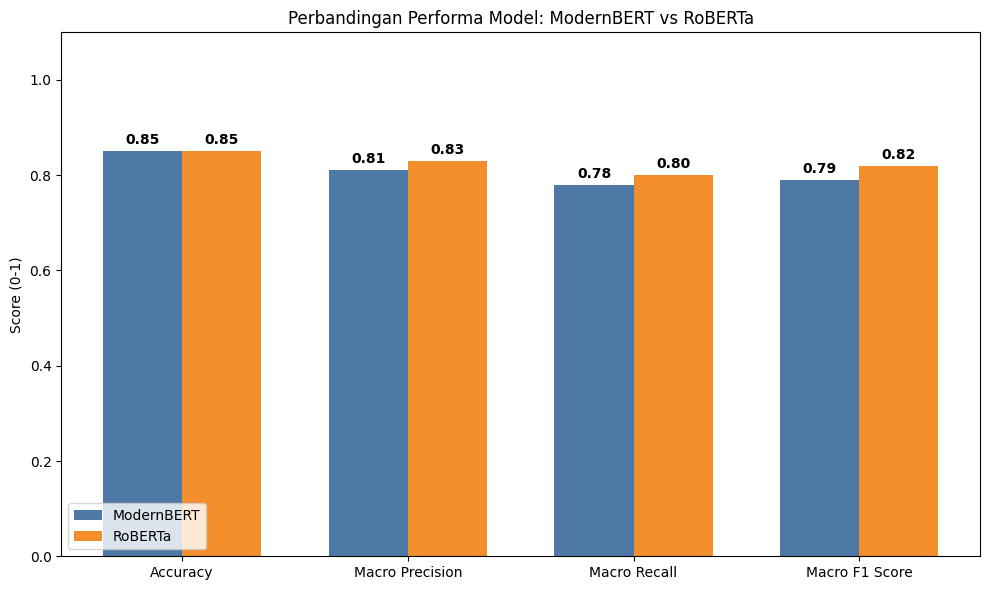

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data dari user
metrics = ['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1 Score']

modernbert_scores = [0.85, 0.81, 0.78, 0.79]

# Nilai untuk IndoBERT
# Acc: 0.93, Macro Prec: 0.91, Macro Rec: 0.89, Macro F1: 0.90
roberta_scores = [0.85, 0.83, 0.80, 0.82]

x = np.arange(len(metrics))  # Lokasi label
width = 0.35  # Lebar bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, modernbert_scores, width, label='ModernBERT', color='#4e79a7')
rects2 = ax.bar(x + width/2, roberta_scores, width, label='RoBERTa', color='#f28e2b')

# Menambahkan teks label, judul, dan penanda sumbu
ax.set_ylabel('Score (0-1)')
ax.set_title('Perbandingan Performa Model: ModernBERT vs RoBERTa')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1) # Memberi ruang untuk label angka di atas bar
ax.legend(loc='lower left')

# Fungsi untuk menampilkan nilai di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Minta RoBERTa prediski dengan data terurut

In [17]:
X_temp = test['clean_text']
y_temp = test['label']

from sklearn.model_selection import train_test_split
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=2/3, shuffle = False
)

In [8]:
# import torch
# from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
# def create_dataset(texts, labels):
#     encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=36, return_tensors='pt')
#     dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(labels)) # would work here
#     return dataset

# label must be convert to list so it worked for torch.tensor (reference line 5)
y_3 = y_test.to_list()
test_dataset  = create_dataset(X_test, y_3)

batch_size = 16
test_loader  = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)

In [9]:
import torch
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from transformers import AutoModelForSequenceClassification
from torch.optim import AdamW
import torch
from sklearn.metrics import classification_report

model_id = "FacebookAI/roberta-base"
model = AutoModelForSequenceClassification.from_pretrained(model_id, cache_dir = "C:/Users/Abdullah Ghassan/.cache/huggingface/hub",
                                                          num_labels = 3)
model.load_state_dict(torch.load('best_model_roberta.pt'))
model.to(device) 

model.eval()
predictions, true_labels = [], []

for batch in test_loader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    
    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    logits = outputs.logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    predictions.extend(np.argmax(logits, axis=1).flatten())
    true_labels.extend(label_ids.flatten())

print(classification_report(true_labels, predictions, target_names=['Neutral', 'Negative', 'Positive']))

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


              precision    recall  f1-score   support

     Neutral       0.72      0.70      0.71        87
    Negative       0.82      0.73      0.77       263
    Positive       0.88      0.93      0.90       490

    accuracy                           0.85       840
   macro avg       0.80      0.79      0.80       840
weighted avg       0.84      0.85      0.84       840



In [20]:
joblib.dump((train, test, true_labels, predictions), 'softeng.joblib')

['softeng.joblib']

# Algoritma merge sample dengan hasil prediksi

In [63]:
"""
goals: merge sample input buat model prediksi (untuk kasus ini contohnya sample input = test dataframe) dengan hasil prediksi

slicing logic -> test.iloc[1259-839:] (slicing 839 baris terakhir dari dataframe) [1]
code row_start untuk df_temp = iloc dibawah berdasarkan logic dari referensi [1] supaya bisa slicing secara dinamis, berapapun panjang dari sample input

flow: slicing ->  reset index sample dan hasil prediksi -> merge

"""
import pandas as pd
row_start = test.shape[0] - len(predictions) 
df_temp = test.iloc[row_start:]
df_temp = df_temp.reset_index()
pred_temp = pd.Series(predictions, name = 'prediksi_model')
result2 = pd.merge(df_temp, pred_temp, left_index = True, right_index = True, how = 'left')
result2

,index,text,sentiment,clean_text,label,prediksi_model
0,420,ustad bajingan seperti ustadtengkuzul sudah ka...,negative,ustad bajingan seperti ustadtengkuzul sudah ka...,1,1
1,421,lihatlah wahai netizen . apakah kalian masih p...,negative,lihatlah wahai netizen . apakah kalian masih p...,1,1
2,422,siapkan payung jika ke sini siang hari . suasa...,positive,siapkan payung jika ke sini siang hari . suasa...,2,2
3,423,tribun : gubernur anies : kami ingin pasar sen...,neutral,tribun gubernur anies kami ingin pasar senen j...,0,0
4,424,lailah banyak banget akun sampah model begini ...,negative,lailah banyak banget akun sampah model begini ...,1,2
...,...,...,...,...,...,...
835,1255,"film tncfu , tidak cocok untuk penonton yang t...",negative,"film tncfu , tidak cocok untuk penonton yang t...",1,1
836,1256,"indihome ini mahal loh bayar nya . hanya , pen...",negative,"indihome ini mahal loh bayar nya . hanya , pen...",1,1
837,1257,"be de gea , cowok cupu yang takut dengan pacar...",negative,"be de gea , cowok cupu yang takut dengan pacar...",1,1
838,1258,valen yang sangat tidak berkualitas . konentat...,negative,valen yang sangat tidak berkualitas . konentat...,1,1


# Algoritma ambil data dengan sentiment yang negative saja

## data dengan sentiment yang negative ini akan dijadikan input ke topic modelling

In [69]:
topic_modelling_input = result2.loc[result2['prediksi_model'] == 1]
topic_modelling_input

,index,text,sentiment,clean_text,label,prediksi_model
0,420,ustad bajingan seperti ustadtengkuzul sudah ka...,negative,ustad bajingan seperti ustadtengkuzul sudah ka...,1,1
1,421,lihatlah wahai netizen . apakah kalian masih p...,negative,lihatlah wahai netizen . apakah kalian masih p...,1,1
10,430,kayak nya mendingan gocar deh,positive,kayak nya mendingan gocar deh,2,1
11,431,tidak ganteng,negative,tidak ganteng,1,1
13,433,bandung macet banget ada apa si,negative,bandung macet banget ada apa si,1,1
...,...,...,...,...,...,...
833,1253,gila saja sih nih handphone samsung mahal bang...,negative,gila saja sih nih handphone samsung mahal bang...,1,1
835,1255,"film tncfu , tidak cocok untuk penonton yang t...",negative,"film tncfu , tidak cocok untuk penonton yang t...",1,1
836,1256,"indihome ini mahal loh bayar nya . hanya , pen...",negative,"indihome ini mahal loh bayar nya . hanya , pen...",1,1
837,1257,"be de gea , cowok cupu yang takut dengan pacar...",negative,"be de gea , cowok cupu yang takut dengan pacar...",1,1


In [32]:
joblib.dump((train, test, true_labels, predictions, topic_modelling_input, sbert_input, sbert_output, umap_output, hdb_machine, topics, probs, topic_modelling_output, topic_info), 'softeng.joblib')

['softeng.joblib']

In [1]:
import joblib
train, test, true_labels, predictions, topic_modelling_input, sbert_input, sbert_output, umap_output, hdb_machine, topics, probs, topic_modelling_output, topic_info = joblib.load('softeng.joblib')

In [14]:
joblib.dump((topics, probs), 'backend.joblib')

['backend.joblib']

In [2]:
import os 
import signal
import subprocess
import sys

In [7]:
import os, signal, subprocess, sys

In [25]:
import pandas as pd
from typing import List
def merge_sample_topic(test:pd.DataFrame, predictions: List[int]) -> pd.DataFrame:
    """
    input: dataframe and list of predicted topic
    process: merge dataframe and predicted topic
    output: return a dtaframe which consist a predicted topic column
    """
    row_start = test.shape[0] - len(predictions) 
    df_temp = test.iloc[row_start:]
    df_temp.reset_index(inplace = True)
    df_temp.drop('level_0', axis = 1, inplace =True)
    pred_temp = pd.Series(predictions, name = 'topics')
    result2 = pd.merge(df_temp, pred_temp, left_index = True, right_index = True, how = 'left')
    return result2

In [26]:
topic_modelling_output = merge_sample_topic(topic_modelling_input, topics)

In [27]:
topic_modelling_output

,index,text,sentiment,clean_text,label,prediksi_model,topics
0,420,ustad bajingan seperti ustadtengkuzul sudah ka...,negative,ustad bajingan seperti ustadtengkuzul sudah ka...,1,1,0
1,421,lihatlah wahai netizen . apakah kalian masih p...,negative,lihatlah wahai netizen . apakah kalian masih p...,1,1,0
2,430,kayak nya mendingan gocar deh,positive,kayak nya mendingan gocar deh,2,1,-1
3,431,tidak ganteng,negative,tidak ganteng,1,1,-1
4,433,bandung macet banget ada apa si,negative,bandung macet banget ada apa si,1,1,1
...,...,...,...,...,...,...,...
224,1253,gila saja sih nih handphone samsung mahal bang...,negative,gila saja sih nih handphone samsung mahal bang...,1,1,1
225,1255,"film tncfu , tidak cocok untuk penonton yang t...",negative,"film tncfu , tidak cocok untuk penonton yang t...",1,1,1
226,1256,"indihome ini mahal loh bayar nya . hanya , pen...",negative,"indihome ini mahal loh bayar nya . hanya , pen...",1,1,1
227,1257,"be de gea , cowok cupu yang takut dengan pacar...",negative,"be de gea , cowok cupu yang takut dengan pacar...",1,1,-1


In [28]:
def extract_topwords(topic_model):
    topic_info = topic_model.get_topic_info()
    topic_descriptions = {}
    for topic_id in topic_info['Topic']:
        if topic_id == -1: 
            continue
        words = [word for word, _ in topic_model.get_topic(topic_id)]
        topic_descriptions[topic_id] = ", ".join(words[:10])
    return topic_descriptions

In [29]:
topic_descriptions = extract_topwords(topic_model)

In [32]:
topic_descriptions

{0: 'itu, nya, yang, ini, tidak, di, jokowi, saja, sudah, dan',
 1: 'tidak, saya, indosat, marah, nya, di, yang, aku, ya, sudah',
 2: 'nya, di, makan, dan, yang, tidak, dengan, makanan, kami, tapi',
 3: 'melelahkan, kagum, titik, minggu, killer, kelas, perjalanan, menyenangkan, efisien, tidur'}

In [37]:
def refine_topic_label(top_words: str) -> str:
    """
    input: one unit sentence text (string)
    process: ask LLM to inference topic into one to two words
    output: return one to two words 
    """
    prompt = f"""Based on the following key terms, give a short, clear, and general topic name (2-4 words max):
    
    Key terms: {top_words}
    
    Topic name:"""
    
    response = llm(prompt, max_new_tokens=10, do_sample=False)
    
    # Extract generated text (adjust based on tokenizer/chat template)
    generated = response[0]['generated_text'].split("Topic name:")[-1].strip()
    return generated.split("\n")[0].strip()

In [40]:
from torch.cuda import empty_cache
from transformers import pipeline
torch.cuda.empty_cache()
llm = pipeline(
                "text-generation",
                model="microsoft/Phi-3-mini-4k-instruct",  
                device='cpu',
                dtype=torch.bfloat16
                )
refined_labels = {}
    
for topic_id, words in topic_descriptions.items():
    refined_labels[topic_id] = refine_topic_label(words)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cpu
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


KeyboardInterrupt: 

In [39]:
torch.cuda.empty_cache()

In [5]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,17,-1_bosan_sinetron_banget_jalan,"[bosan, sinetron, banget, jalan, orang, gopay,...",[kenapa ya kalau nyepi mesti matikan lampu ?! ...
1,0,115,0_nya_itu_yang_ini,"[nya, itu, yang, ini, tidak, di, saja, jokowi,...","[ya maka dari itu , yang dibilang dari tadi ju..."
2,1,54,1_tidak_saya_nya_indosat,"[tidak, saya, nya, indosat, marah, di, ya, yan...","[halo minimal , kok tidak ditanggal ya , saya ..."
3,2,30,2_nya_di_makan_dan,"[nya, di, makan, dan, yang, tidak, dengan, mak...","[tempat nya sungguh bagus , suasa nya juga ker..."
4,3,13,3_melelahkan_tidur_mendingan_menyenangkan,"[melelahkan, tidur, mendingan, menyenangkan, m...","[hari minggu ya panjang dan melelahkan, senin ..."


In [18]:
topic_model.get_topic(0)

[('nya', 0.05200474852846109),
 ('itu', 0.04833900169633662),
 ('yang', 0.0482272364278341),
 ('ini', 0.04551919864051053),
 ('tidak', 0.04439198116743297),
 ('di', 0.03794677282661403),
 ('saja', 0.03724966002506158),
 ('jokowi', 0.03413401432289205),
 ('sudah', 0.03394987692344164),
 ('dan', 0.03008658229862419)]

In [20]:
topic_modelling_output = topic_modelling_input.copy()
topic_modelling_output['topics'] = topics

In [23]:
topic_modelling_output.reset_index(inplace = True)

In [ ]:
from transformers import pipeline
import torch
from bertopic import BERTopic
topic_model = BERTopic.load('topic_model')

In [3]:
# Step 2: Extract top words per topic
topic_info = topic_model.get_topic_info()
topic_descriptions = {}
for topic_id in topic_info['Topic']:
    if topic_id == -1: 
        continue
    words = [word for word, _ in topic_model.get_topic(topic_id)]
    topic_descriptions[topic_id] = ", ".join(words[:10])

In [4]:
# Step 3: Use LLaMA to generate better labels or summaries
# Load a local LLaMA (e.g., via Hugging Face if you have access)
llm = pipeline(
    "text-generation",
    model="microsoft/Phi-3-mini-4k-instruct",  # or use "unsloth/Llama-3.1-8B-Instruct" for efficient inference
    device='cuda',
    torch_dtype=torch.bfloat16
)

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda


In [5]:
def refine_topic_label(top_words: str) -> str:
    prompt = f"""Based on the following key terms, give a short, clear, and general topic name (2-4 words max):
    
    Key terms: {top_words}
    
    Topic name:"""
    
    response = llm(prompt, max_new_tokens=10, do_sample=False)
    # Extract generated text (adjust based on tokenizer/chat template)
    generated = response[0]['generated_text'].split("Topic name:")[-1].strip()
    return generated.split("\n")[0].strip()

# Apply to each topic
refined_labels = {}
for topic_id, words in topic_descriptions.items():
    refined_labels[topic_id] = refine_topic_label(words)

# Update BERTopic
topic_model.set_topic_labels(refined_labels)
print(topic_model.get_topic_info())

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


   Topic  Count                             Name                CustomName  \
0     -1     26         -1_nya_bosan_kalau_orang  -1_nya_bosan_kalau_orang   
1      0    106               0_itu_nya_yang_ini           Jokowi's Policy   
2      1     55       1_tidak_saya_indosat_marah             Indosat Anger   
3      2     30               2_nya_di_makan_dan     "Kami Makanan Tidak D   
4      3     12  3_melelahkan_kagum_titik_minggu  Efisien Perjalanan Kelas   

                                      Representation  \
0  [nya, bosan, kalau, orang, sinetron, saja, yan...   
1  [itu, nya, yang, ini, tidak, di, jokowi, saja,...   
2  [tidak, saya, indosat, marah, nya, di, yang, a...   
3  [nya, di, makan, dan, yang, tidak, dengan, mak...   
4  [melelahkan, kagum, titik, minggu, killer, kel...   

                                 Representative_Docs  
0  [feeling gue karena yang dibahas itu gopay , k...  
1  [ya maka dari itu , yang dibilang dari tadi ju...  
2  [halo minimal , kok tidak 

In [8]:
refined_labels

{0: "Jokowi's Policy",
 1: 'Indosat Anger',
 2: '"Kami Makanan Tidak D',
 3: 'Efisien Perjalanan Kelas'}